In [10]:
import matplotlib.pyplot as plt
import os
import pathlib
import tensorflow as tf

In [11]:
image_height = 224
image_width = 224
channels = 3
normalize = False
dataset_dir = "../../../deeplearning/TensorFlow2.0_ResNet/dataset"
train_dir = dataset_dir + "train"
valid_dir = dataset_dir + "valid"
test_dir = dataset_dir + "test"

In [12]:
def load_and_preprocess_image(img_path):
    # read pictures
    img_raw = tf.io.read_file(img_path)
    # decoding raw images
    img_tensor = tf.image.decode_png(img_raw, channels=channels)
    # resizing
    img_tensor = tf.image.resize(img_tensor, [image_height, image_width])
    img_tensor = tf.cast(img_tensor, tf.float32)
    #normalize
    img = img_tensor / 255.0
    return img        

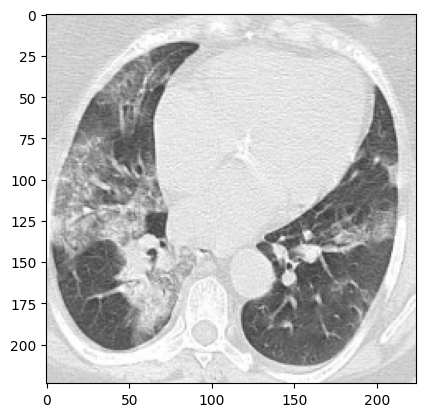

In [23]:
path = "../../../datasets/covidDataset/COVID/Covid (1000).png"
image = load_and_preprocess_image(path)
plt.imshow(image)
plt.show()

In [14]:
def get_images_and_labels(data_root_dir):
    # get all images' paths (format: string)
    data_root = pathlib.Path(data_root_dir)
    all_image_path = [str(path) for path in list(data_root.glob('*/*'))]
    # get labels' names
    label_names = sorted(item.name for item in data_root.glob('*/'))
    # dict: {label : index}
    label_to_index = dict((label, index) for index, label in enumerate(label_names))
    # get all images' labels
    all_image_label = [label_to_index[pathlib.Path(single_image_path).parent.name] for single_image_path in all_image_path]

    return all_image_path, all_image_label

In [15]:
def get_dataset(dataset_root_dir):
    all_image_path, all_image_label = get_images_and_labels(data_root_dir=dataset_root_dir)
    print("image_path: {}".format(all_image_path[:]))
    print("image_label: {}".format(all_image_label[:]))
    # load the dataset and preprocess images
    image_dataset = tf.data.Dataset.from_tensor_slices(all_image_path).map(load_and_preprocess_image)
    label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    image_count = len(all_image_path)

    return dataset, image_count

In [24]:
[d, c] = get_dataset(dataset_root_dir=train_dir)
print(len(d))


image_path: []
image_label: []


TypeError: in user code:

    File "<ipython-input-12-b1159673cc46>", line 3, in load_and_preprocess_image  *
        img_raw = tf.io.read_file(img_path)

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


In [17]:
def generate_datasets():
    train_dataset, train_count = get_dataset(dataset_root_dir=train_dir)
    valid_dataset, valid_count = get_dataset(dataset_root_dir=valid_dir)
    test_dataset, test_count = get_dataset(dataset_root_dir=test_dir)


    # read the original_dataset in the form of batch
    train_dataset = train_dataset.shuffle(buffer_size=train_count).batch(batch_size=BATCH_SIZE)
    valid_dataset = valid_dataset.batch(batch_size=BATCH_SIZE)
    test_dataset = test_dataset.batch(batch_size=BATCH_SIZE)

    return train_dataset, valid_dataset, test_dataset, train_count, valid_count, test_count

In [21]:
train_dataset, valid_dataset, test_dataset, train_count, valid_count, test_count = generate_datasets()

image_path: []
image_label: []


TypeError: in user code:

    File "<ipython-input-12-b1159673cc46>", line 3, in load_and_preprocess_image  *
        img_raw = tf.io.read_file(img_path)

    TypeError: Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.
